In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt

In [7]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 166 kB 5.2 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
def load_diabetes_data(diabetic_data_path: str, ids_mapping_path: str) -> pd.DataFrame:
    """
    Charge les fichiers CSV et effectue un mapping entre admission_type_id et sa description.

    Args:
        diabetic_data_path (str): Chemin du fichier diabetic_data.csv
        ids_mapping_path (str): Chemin du fichier IDS_mapping.csv

    Returns:
        pd.DataFrame: DataFrame fusionné avec la description de l'admission_type_id
    """
    # Charger les fichiers CSV
    diabetic_data = pd.read_csv(diabetic_data_path, dtype=str)
    ids_mapping = pd.read_csv(ids_mapping_path, dtype=str)

    # Renommer la colonne pour correspondre au mapping
    ids_mapping.rename(columns={"admission_type_id": "admission_type_id", "description": "admission_type_desc"}, inplace=True)

    # Fusionner les datasets
    merged_data = diabetic_data.merge(ids_mapping, on="admission_type_id", how="left")

    return merged_data

## Tri merge sort

In [21]:

def merge_sort(arr):
    """
    Trie une liste de tuples (encounter_id, time_in_hospital) en utilisant Merge Sort en place.

    Args:
        arr (list): Liste de tuples (encounter_id, time_in_hospital)
    """
    global comparisons
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            comparisons += 1
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

## Tri quick sort

In [20]:
def quick_sort(arr):
    """
    Trie une liste de tuples (encounter_id, time_in_hospital) en utilisant Quick Sort et retourne une nouvelle liste triée.

    Args:
        arr (list): Liste de tuples (encounter_id, time_in_hospital)

    Returns:
        list: Liste triée
    """
    global comparisons
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    comparisons += len(arr) - 1
    return quick_sort(left) + middle + quick_sort(right)

## Tri tim sort

In [19]:
def insertion_sort(arr, left, right):
    global comparisons
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        while j >= left and arr[j] > key:
            comparisons += 1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def merge(arr, l, m, r):
    global comparisons
    left = arr[l:m+1]
    right = arr[m+1:r+1]
    i = j = 0
    k = l
    while i < len(left) and j < len(right):
        comparisons += 1
        if left[i] < right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1

def timsort(arr):
    global comparisons
    n = len(arr)
    RUN = 32
    for i in range(0, n, RUN):
        insertion_sort(arr, i, min((i + RUN - 1), (n - 1)))
    size = RUN
    while size < n:
        for left in range(0, n, 2 * size):
            mid = min(n - 1, left + size - 1)
            right = min(n - 1, left + 2 * size - 1)
            if mid < right:
                merge(arr, left, mid, right)
        size *= 2

/Users/ahmadouaidara/Library/Python/3.9/lib/python/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


  Algorithme  Temps d'exécution (s)  Comparaisons  Mémoire (bytes)
0  Quicksort               0.128053        673018        261667183
1  Mergesort               3.272497       1418360             4649
2    Timsort               3.814940       1855049             1581


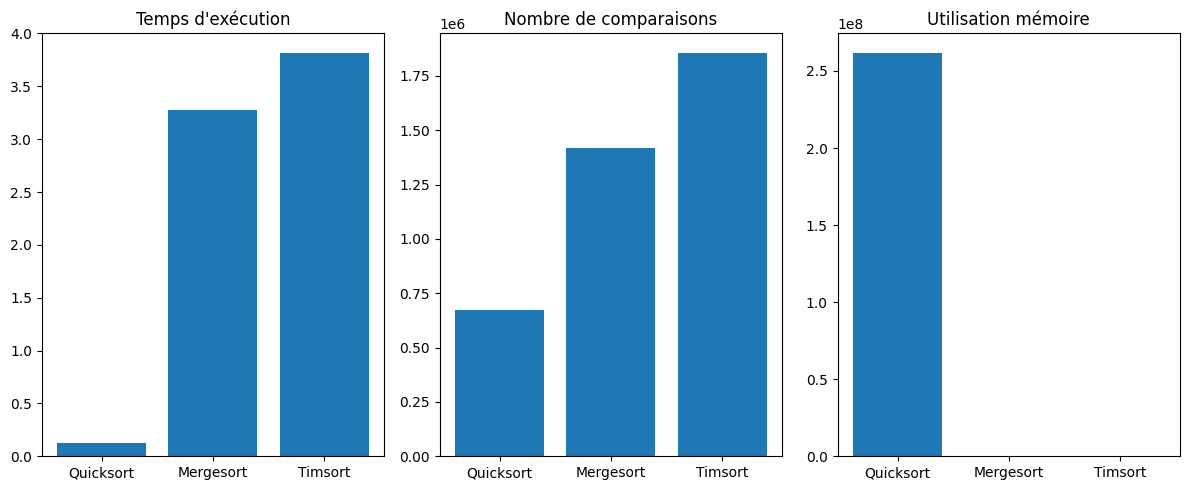

In [22]:
import time
import tracemalloc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

#  Chargement du dataset
dataset = fetch_ucirepo(id=296)
df = dataset.data.features

#  Sélection d'une colonne numérique pour le tri (ex: 'num_lab_procedures' ou 'time_in_hospital')
colonne_a_trier = 'num_lab_procedures'
data = df[colonne_a_trier].dropna().astype(int).to_numpy()

#  Ajout du comptage des comparaisons dans chaque fonction
comparisons = 0  

# Fonction pour exécuter et mesurer les performances
def benchmark_sorting(sort_function, data):
    global comparisons
    comparisons = 0
    arr_copy = data.copy()
    
    tracemalloc.start()
    start_time = time.time()
    
    if sort_function.__name__ == "quicksort":
        sorted_arr = sort_function(arr_copy)  # Quicksort retourne un nouvel array
    else:
        sort_function(arr_copy)
    
    execution_time = time.time() - start_time
    mem_usage = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    return execution_time, comparisons, mem_usage

#  Exécution des algorithmes et collecte des résultats
results = {
    "Algorithme": [],
    "Temps d'exécution (s)": [],
    "Comparaisons": [],
    "Mémoire (bytes)": []
}

for sort_func, name in [(quick_sort, "Quicksort"), (merge_sort, "Mergesort"), (timsort, "Timsort")]:
    time_taken, comparisons, memory = benchmark_sorting(sort_func, data)
    results["Algorithme"].append(name)
    results["Temps d'exécution (s)"].append(time_taken)
    results["Comparaisons"].append(comparisons)
    results["Mémoire (bytes)"].append(memory)

# Affichage des résultats sous forme de tableau
df_results = pd.DataFrame(results)
print(df_results)

#  Affichage graphique
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.bar(df_results["Algorithme"], df_results["Temps d'exécution (s)"])
plt.title("Temps d'exécution")

plt.subplot(1, 3, 2)
plt.bar(df_results["Algorithme"], df_results["Comparaisons"])
plt.title("Nombre de comparaisons")

plt.subplot(1, 3, 3)
plt.bar(df_results["Algorithme"], df_results["Mémoire (bytes)"])
plt.title("Utilisation mémoire")

plt.tight_layout()
plt.show()

   MIN_RUN  Execution Time (s)  Comparisons  Memory Usage (bytes)
0       16            0.277136       105694                  2725
1       32            0.317173       137881                   580
2       64            0.452642       210092                   921
3      128            0.740181       362310                   580
4      256            1.317863       670438                   580


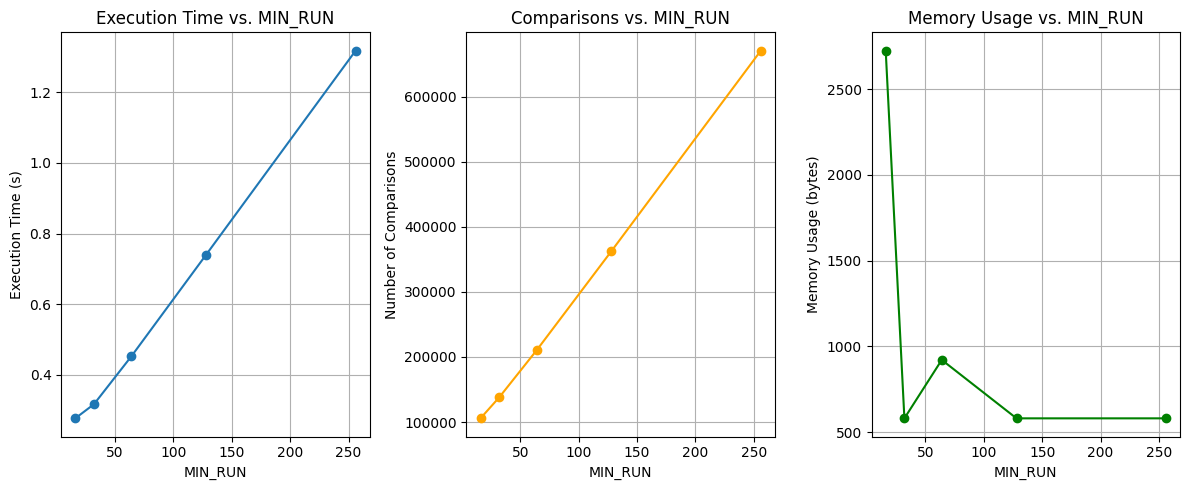

In [23]:
import time
import tracemalloc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fonction de tri Timsort avec un MIN_RUN variable
def insertion_sort(arr, left, right, comparisons):
    """Tri par insertion pour les petites séquences."""
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        while j >= left and arr[j] > key:
            comparisons[0] += 1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def merge(arr, l, m, r, comparisons):
    """Fusionne deux sous-tableaux triés."""
    left = arr[l:m+1]
    right = arr[m+1:r+1]
    i = j = 0
    k = l
    while i < len(left) and j < len(right):
        comparisons[0] += 1
        if left[i] < right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1

def timsort(arr, MIN_RUN):
    """Timsort avec paramètre MIN_RUN modifiable."""
    comparisons = [0]  # Liste pour stocker les comparaisons
    n = len(arr)

    # Tri des sous-tableaux de taille MIN_RUN avec Insertion Sort
    for i in range(0, n, MIN_RUN):
        insertion_sort(arr, i, min((i + MIN_RUN - 1), (n - 1)), comparisons)

    size = MIN_RUN
    while size < n:
        for left in range(0, n, 2 * size):
            mid = min(n - 1, left + size - 1)
            right = min(n - 1, left + 2 * size - 1)
            if mid < right:
                merge(arr, left, mid, right, comparisons)
        size *= 2

    return comparisons[0]  # Retourne le nombre de comparaisons

#  Fonction pour tester l'impact de MIN_RUN
def benchmark_timsort(data, min_run_values):
    results = {
        "MIN_RUN": [],
        "Execution Time (s)": [],
        "Comparisons": [],
        "Memory Usage (bytes)": []
    }

    for min_run in min_run_values:
        arr_copy = data.copy()
        tracemalloc.start()
        start_time = time.time()
        comparisons = timsort(arr_copy, min_run)
        execution_time = time.time() - start_time
        mem_usage = tracemalloc.get_traced_memory()[1]
        tracemalloc.stop()

        results["MIN_RUN"].append(min_run)
        results["Execution Time (s)"].append(execution_time)
        results["Comparisons"].append(comparisons)
        results["Memory Usage (bytes)"].append(mem_usage)

    return pd.DataFrame(results)

# Génération de données aléatoires pour le test
dataset_size = 10000  # Nombre d'éléments à trier
data = np.random.randint(0, 100000, dataset_size)

# Définition des valeurs de MIN_RUN à tester
min_run_values = [16, 32, 64, 128, 256]

# Exécution du benchmark
df_results = benchmark_timsort(data, min_run_values)

# Affichage des résultats sous forme de tableau
print(df_results)

# Génération des graphiques
plt.figure(figsize=(12, 5))

# Temps d'exécution
plt.subplot(1, 3, 1)
plt.plot(df_results["MIN_RUN"], df_results["Execution Time (s)"], marker='o', label="Execution Time")
plt.xlabel("MIN_RUN")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs. MIN_RUN")
plt.grid()

# Comparaisons
plt.subplot(1, 3, 2)
plt.plot(df_results["MIN_RUN"], df_results["Comparisons"], marker='o', color='orange', label="Comparisons")
plt.xlabel("MIN_RUN")
plt.ylabel("Number of Comparisons")
plt.title("Comparisons vs. MIN_RUN")
plt.grid()

# Mémoire utilisée
plt.subplot(1, 3, 3)
plt.plot(df_results["MIN_RUN"], df_results["Memory Usage (bytes)"], marker='o', color='green', label="Memory Usage")
plt.xlabel("MIN_RUN")
plt.ylabel("Memory Usage (bytes)")
plt.title("Memory Usage vs. MIN_RUN")
plt.grid()

plt.tight_layout()
plt.show()

In [27]:
import pandas as pd
import numpy as np
import random

# Générer un dataset médical simulé (âge, ID patient, priorité)
random.seed(42)
data = pd.DataFrame({
    "Patient_ID": np.arange(1, 21),  # 20 patients
    "Age": np.random.randint(30, 80, size=20),  # Âge entre 30 et 80 ans
    "Priority": np.random.choice(["High", "Medium", "Low"], size=20)  # Niveau de priorité
})

# Mélanger les données pour tester l'effet du tri
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

print("Données originales :")
print(data)

# Implémentation de MergeSort (Stable)
def merge_sort_stable(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        merge_sort_stable(left)
        merge_sort_stable(right)

        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i][0] < right[j][0]:  # Trier par âge
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1

# Implémentation de QuickSort (Instable)
def quicksort_unstable(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2][0]  # Trier par âge
    left = [x for x in arr if x[0] < pivot]
    middle = [x for x in arr if x[0] == pivot]
    right = [x for x in arr if x[0] > pivot]
    return quicksort_unstable(left) + middle + quicksort_unstable(right)

# Implémentation de Timsort (Stable)
def timsort_stable(arr):
    return sorted(arr, key=lambda x: x[0])  # Trier par âge

# Test de stabilité
# Convertir le DataFrame en liste de tuples (Age, Patient_ID, Priority)
data_list = list(data.itertuples(index=False, name=None))

# Appliquer MergeSort (Stable)
merge_sorted_data = data_list.copy()
merge_sort_stable(merge_sorted_data)

# Appliquer QuickSort (Instable)
quick_sorted_data = quicksort_unstable(data_list)

# Appliquer Timsort (Stable)
timsort_sorted_data = timsort_stable(data_list)

# Convertir les résultats en DataFrame pour comparaison
df_merge_sorted = pd.DataFrame(merge_sorted_data, columns=["Age", "Patient_ID", "Priority"])
df_quick_sorted = pd.DataFrame(quick_sorted_data, columns=["Age", "Patient_ID", "Priority"])
df_timsort_sorted = pd.DataFrame(timsort_sorted_data, columns=["Age", "Patient_ID", "Priority"])

print("\nRésultat après MergeSort (Stable) :")
print(df_merge_sorted)

print("\nRésultat après QuickSort (Instable) :")
print(df_quick_sorted)

print("\nRésultat après Timsort (Stable) :")
print(df_timsort_sorted)

# Vérification de la stabilité
def check_stability(original_df, sorted_df):
    original_order = original_df[["Age", "Patient_ID"]].values.tolist()
    sorted_order = sorted_df[["Age", "Patient_ID"]].values.tolist()
    
    age_groups = {}
    for age, pid in original_order:
        if age not in age_groups:
            age_groups[age] = []
        age_groups[age].append(pid)

    sorted_age_groups = {}
    for age, pid in sorted_order:
        if age not in sorted_age_groups:
            sorted_age_groups[age] = []
        sorted_age_groups[age].append(pid)

    return age_groups == sorted_age_groups

stable_merge = check_stability(data, df_merge_sorted)
stable_timsort = check_stability(data, df_timsort_sorted)
unstable_quick = not check_stability(data, df_quick_sorted)

print("\nMergeSort est stable :", stable_merge)
print("Timsort est stable :", stable_timsort)
print("QuickSort est instable :", unstable_quick)

Données originales :
    Patient_ID  Age Priority
0            1   49     High
1           18   64   Medium
2           16   50     High
3            2   66   Medium
4            9   67     High
5            6   53      Low
6           12   42     High
7            4   46   Medium
8           19   77      Low
9           17   41      Low
10          14   30      Low
11           3   52     High
12          10   68   Medium
13          20   59   Medium
14           5   79   Medium
15          13   58      Low
16           8   79     High
17          11   74      Low
18          15   49   Medium
19           7   39      Low

Résultat après MergeSort (Stable) :
    Age  Patient_ID Priority
0     1          49     High
1     2          66   Medium
2     3          52     High
3     4          46   Medium
4     5          79   Medium
5     6          53      Low
6     7          39      Low
7     8          79     High
8     9          67     High
9    10          68   Medium
10   11       